<a href="https://colab.research.google.com/github/KamaljeetSahoo/Basic-ANN-Pytorch/blob/master/Basic_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [1]:
!wget https://gist.githubusercontent.com/chaityacshah/899a95deaf8b1930003ae93944fd17d7/raw/3d35de839da708595a444187e9f13237b51a2cbe/pima-indians-diabetes.csv

--2021-02-27 06:40:26--  https://gist.githubusercontent.com/chaityacshah/899a95deaf8b1930003ae93944fd17d7/raw/3d35de839da708595a444187e9f13237b51a2cbe/pima-indians-diabetes.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23610 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  23.06K  --.-KB/s    in 0.002s  

2021-02-27 06:40:26 (10.8 MB/s) - ‘pima-indians-diabetes.csv’ saved [23610/23610]



# Libraries

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set_style("whitegrid")

# Data Visualisation

In [3]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.head(10)

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.isnull().sum()

1. Number of times pregnant                                                    0
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
3. Diastolic blood pressure (mm Hg)                                            0
4. Triceps skin fold thickness (mm)                                            0
5. 2-Hour serum insulin (mu U/ml)                                              0
6. Body mass index (weight in kg/(height in m)^2)                              0
7. Diabetes pedigree function                                                  0
8. Age (years)                                                                 0
9. Class variable (0 or 1)                                                     0
dtype: int64

In [ ]:
df.describe()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


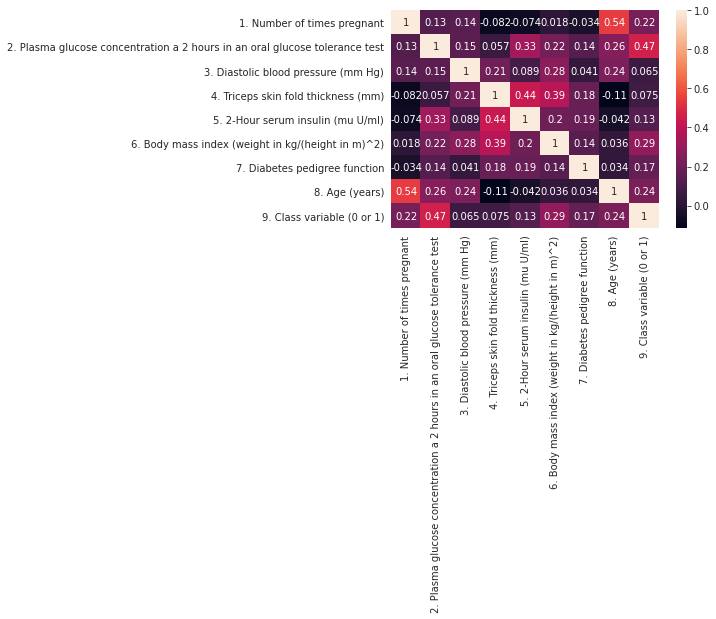

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)

# Data Preparation

In [ ]:
X = df.drop('9. Class variable (0 or 1)', axis=1).values
Y = df['9. Class variable (0 or 1)'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

# Model

In [ ]:
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
def ann_viz(model, view=True, filename="network.gv"):
    """Vizualizez a Sequential model.

    # Arguments
        model: A Keras model instance.

        view: whether to display the model after generation.

        filename: where to save the vizualization. (a .gv file)

        title: A title for the graph
    """
    from graphviz import Digraph

    input_layer = 0
    hidden_layers_nr = 0
    layer_types = []
    hidden_layers = []
    output_layer = 0
    layers = [layer for layer in model.modules() if type(layer) == torch.nn.Linear]

    for layer in layers:
        if layer == layers[0]:
            input_layer = layer.in_features
            hidden_layers_nr += 1
            if type(layer) == torch.nn.Linear:                
                hidden_layers.append(layer.out_features)
                layer_types.append("Dense")
            else:
                raise Exception("Input error")

        else:
            if layer == layers[-1]:
                output_layer = layer.out_features
            else:
                hidden_layers_nr += 1
                if type(layer) == torch.nn.Linear:

                    hidden_layers.append(layer.out_features)
                    layer_types.append("Dense")
                else:
                    raise Exception("Hidden error")
        last_layer_nodes = input_layer
        nodes_up = input_layer

    g = Digraph("g", filename=filename)
    n = 0
    g.graph_attr.update(splines="false", nodesep="0.5", ranksep="0", rankdir='LR')
    # Input Layer
    with g.subgraph(name="cluster_input") as c:
        if type(layers[0]) == torch.nn.Linear:
            the_label = "Input Layer"
            if layers[0].in_features > 10:
                the_label += " (+" + str(layers[0].in_features - 10) + ")"
                input_layer = 10
            c.attr(color="white")
            for i in range(0, input_layer):
                n += 1
                c.node(str(n))
                c.attr(labeljust="1")
                c.attr(label=the_label, labelloc="bottom")
                c.attr(rank="same")                
                c.node_attr.update(
                    width="0.65",
                    style="filled",                    
                    shape="circle",
                    color=HAPPY_COLORS_PALETTE[3],
                    fontcolor=HAPPY_COLORS_PALETTE[3],
                )
    for i in range(0, hidden_layers_nr):
        with g.subgraph(name="cluster_" + str(i + 1)) as c:
            if layer_types[i] == "Dense":
                c.attr(color="white")
                c.attr(rank="same")
                the_label = f'Hidden Layer {i + 1}'
                if layers[i].out_features > 10:
                    the_label += " (+" + str(layers[i].out_features - 10) + ")"
                    hidden_layers[i] = 10
                c.attr(labeljust="right", labelloc="b", label=the_label)
                for j in range(0, hidden_layers[i]):
                    n += 1
                    c.node(
                        str(n),
                        width="0.65",
                        shape="circle",
                        style="filled",
                        color=HAPPY_COLORS_PALETTE[0],
                        fontcolor=HAPPY_COLORS_PALETTE[0],
                    )
                    for h in range(nodes_up - last_layer_nodes + 1, nodes_up + 1):
                        g.edge(str(h), str(n))
                last_layer_nodes = hidden_layers[i]
                nodes_up += hidden_layers[i]
            else:
                raise Exception("Hidden layer type not supported")

    with g.subgraph(name="cluster_output") as c:
        if type(layers[-1]) == torch.nn.Linear:
            c.attr(color="white")
            c.attr(rank="same")
            c.attr(labeljust="1")
            for i in range(1, output_layer + 1):
                n += 1
                c.node(
                    str(n),
                    width="0.65",
                    shape="circle",
                    style="filled",
                    color=HAPPY_COLORS_PALETTE[4],
                    fontcolor=HAPPY_COLORS_PALETTE[4],
                    
                )
                for h in range(nodes_up - last_layer_nodes + 1, nodes_up + 1):
                    g.edge(str(h), str(n))
            c.attr(label="Output Layer", labelloc="bottom")
            c.node_attr.update(
                color="#2ecc71", style="filled", fontcolor="#2ecc71", shape="circle"
            )

    g.attr(arrowShape="none")
    g.edge_attr.update(arrowhead="none", color="#707070", penwidth="2")
    if view is True:
        g.view()

    return g

In [ ]:
class ANN(nn.Module):
    def __init__(self, in_features = 8, hidden1 = 32, hidden2 = 32, out_features = 2):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
torch.manual_seed(20)
model = ANN()
model.train()

ANN(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=2, bias=True)
)

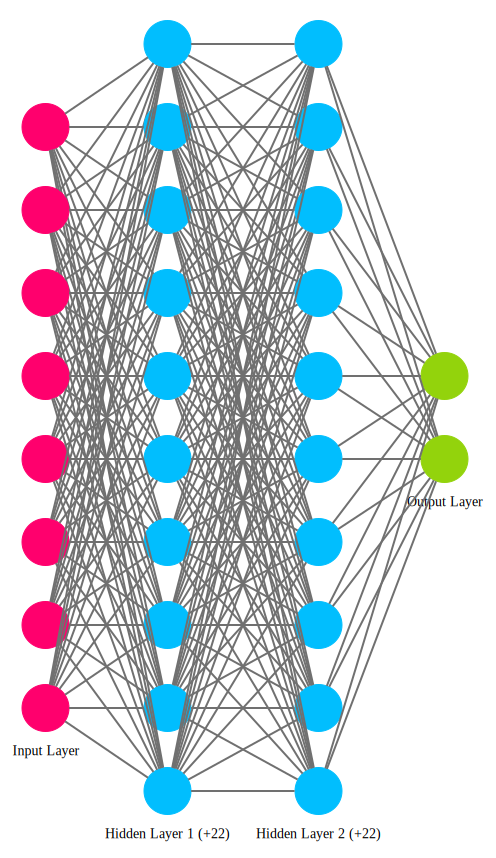

In [ ]:
ann_viz(model, view=False)

# Model Parameters

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.0001)

# Training

In [ ]:
n_epoch = 10000
loss_list = []
for i in range(n_epoch):
    Y_pred = model(X_train)
    train_loss = loss_function(Y_pred, Y_train)
    loss_list.append(train_loss.item())
    if i%100==99:
        print(f'Epoch :{i+1} loss :{train_loss.item()}')
    optimiser.zero_grad()
    train_loss.backward()
    optimiser.step()

Epoch :100 loss :0.6572433114051819
Epoch :200 loss :0.5868644118309021
Epoch :300 loss :0.5630478262901306
Epoch :400 loss :0.5505251884460449
Epoch :500 loss :0.5428259968757629
Epoch :600 loss :0.5360120534896851
Epoch :700 loss :0.5302756428718567
Epoch :800 loss :0.5252026915550232
Epoch :900 loss :0.5202588438987732
Epoch :1000 loss :0.515230119228363
Epoch :1100 loss :0.510227620601654
Epoch :1200 loss :0.50494784116745
Epoch :1300 loss :0.4981836676597595
Epoch :1400 loss :0.49190887808799744
Epoch :1500 loss :0.48609670996665955
Epoch :1600 loss :0.47954466938972473
Epoch :1700 loss :0.4729483425617218
Epoch :1800 loss :0.46664443612098694
Epoch :1900 loss :0.4604358971118927
Epoch :2000 loss :0.4543372094631195
Epoch :2100 loss :0.4480225145816803
Epoch :2200 loss :0.44177505373954773
Epoch :2300 loss :0.4354169964790344
Epoch :2400 loss :0.42859625816345215
Epoch :2500 loss :0.4218743145465851
Epoch :2600 loss :0.4151095747947693
Epoch :2700 loss :0.4086109697818756
Epoch :2

Text(0.5, 0, 'Epoch')

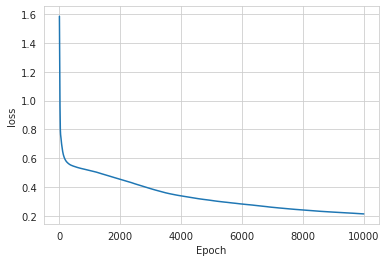

In [ ]:
plt.plot(range(n_epoch), loss_list)
plt.ylabel('loss')
plt.xlabel('Epoch')

In [ ]:
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.numpy(), predictions)
cm

array([[83, 24],
       [24, 23]])

Text(69.0, 0.5, 'Prediction values')

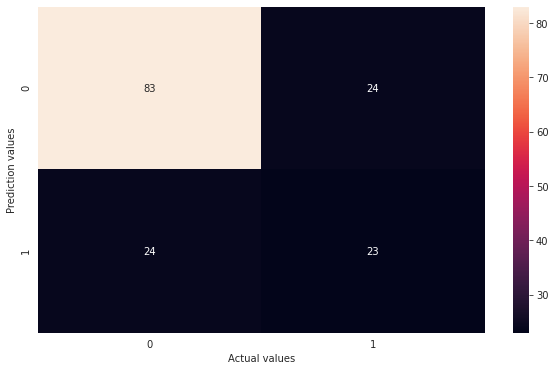

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual values')
plt.ylabel('Prediction values')